In [1]:

from llm_culture.analysis.utils import get_stories, get_plotting_infos, preprocess_stories, get_similarity_matrix
from llm_culture.analysis.utils import compute_between_gen_similarities, get_polarities_subjectivities, get_creativity_indexes
from llm_culture.analysis.plots import *
from llm_culture.analysis.comparison_plots import *

import re

/Users/jperez/miniconda3/envs/LLM-Culture/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to /Users/jperez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/jperez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jperez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!pip install seaborn
!pip install ptitprince

In [2]:
# folders = ['permut_fully_connected_prop_0RomNotScifi_10ScifiNotRom',
#             'permut_fully_connected_prop_2RomNotScifi_8ScifiNotRom', 
#             'permut_fully_connected_prop_4RomNotScifi_6ScifiNotRom',
#             'permut_fully_connected_prop_6RomNotScifi_4ScifiNotRom',
#             'permut_fully_connected_prop_8RomNotScifi_2ScifiNotRom',
#             'permut_fully_connected_prop_10RomNotScifi_0ScifiNotRom']

folders = ['selectivePermut_fully_connected_prop_0romance_10scifi_2',
           'selectivePermut_fully_connected_prop_5romance_5scifi_2',
           'selectivePermut_fully_connected_prop_10romance_0scifi_2']

In [24]:

def get_choices(folder, start_flag = None, end_flag = None):
    pattern = rf"{start_flag}(.*?){end_flag}"
    json_files = [file for file in os.listdir(folder) if file.endswith('.json')]
    all_choices = []
    # json_file  = folder + '/output.json'
    for json_file in json_files:
        all_choices.append([])
        with open(folder + '/' + json_file, 'r') as file:
                data = json.load(file)
                stories = data['stories']
                for gen in stories:
                    all_choices[-1].append([])
                    for s in gen[1:]:
                        all_choices[-1][-1].append([])

                        try:                       
                           
                            choice =  int(re.findall(r'\d+', re.search(pattern, s).group(1).strip() )[0])
                            if choice >= 10:
                                 print('choice', choice)
                                 print('s', s)
                                 print(json_file)
                            all_choices[-1][-1][-1].append(choice)
                        except:
                            all_choices[-1][-1][-1].append(np.nan)
                            pass


    return all_choices
    
    

In [25]:
all_folders_stories = []
all_folders_choices = []

for folder in folders:

    # all_seeds_stories = get_stories('Results/'+ folder, start_flag = "##STORY##", end_flag = "##STORYEND##")
    # all_folders_stories.append(all_seeds_stories)

    all_seeds_choices = get_choices('Results/'+ folder, start_flag = "##CHOICE##", end_flag = "##CHOICEEND##")
    all_folders_choices.append(all_seeds_choices)



    

choice 10
s 1. ##CHOICE##: [[10]] ##CHOICEEND##
2. ##PERMUTATIONS## [[1. But I must explain to you how all this mistaken idea of denouncing of a pleasure and **condemning** pain was born, 2. I will give you a complete account of the **alien** system, and expound the actual teachings of the great explorer of the truth, the master-builder of human **contentment**, 3. No one rejects, dislikes, or avoids pleasure itself, because it is **artificial** pleasure, but because those who do not know how to pursue pleasure **ethically** encounter consequences that are extremely painful, 4. Nor again is there anyone who loves or pursues or desires to obtain pain of itself, because it is **agony**, but occasionally circumstances occur in which toil and **isolation** can procure him some great pleasure.]] ##PERMUTATIONSEND##
3. ##STORY## But I must explain to you how all this mistaken idea of denouncing of a pleasure and condemning pain was born and I will give you a complete account of the alien sys

In [26]:
for i in range(len(all_folders_choices)):

    print(f"Folder {i}:", np.nanmean(np.array((all_folders_choices[i])).flatten()))
    for j in range(len(all_folders_choices[i])):
        print(f"Seed {j}", np.nanmean(np.array((all_folders_choices[i][j])).flatten()))

print(all_folders_choices[1][1])


Folder 0: 2.8950437317784257
Seed 0 2.7790697674418605
Seed 1 3.164705882352941
Seed 2 3.2
Seed 3 2.4482758620689653
Folder 1: 5.757309941520468
Seed 0 2.9166666666666665
Seed 1 14.447058823529412
Seed 2 2.7176470588235295
Seed 3 3.0113636363636362
Folder 2: 2.5514285714285716
Seed 0 2.6436781609195403
Seed 1 2.4318181818181817
Seed 2 2.6091954022988504
Seed 3 2.522727272727273
[[[1], [2], [2], [1], [1], [nan], [nan], [1001], [2]], [[2], [3], [3], [3], [4], [3], [3], [7], [3]], [[1], [nan], [1], [1], [5], [5], [6], [5], [6]], [[1], [2], [1], [3], [4], [1], [3], [1], [1]], [[2], [1], [1], [1], [2], [4], [2], [nan], [5]], [[2], [2], [2], [2], [3], [2], [2], [2], [2]], [[2], [3], [1], [4], [3], [2], [5], [2], [6]], [[3], [0], [2], [2], [7], [2], [2], [3], [2]], [[3], [2], [2], [4], [4], [nan], [6], [7], [4]], [[2], [1], [2], [2], [3], [4], [1], [2], [3]]]


In [27]:
print(np.array(all_folders_choices).shape)
print(np.array(all_folders_choices[0][0][0]))

(3, 4, 10, 9, 1)
[[ 2.]
 [nan]
 [10.]
 [ 1.]
 [nan]
 [ 5.]
 [ 2.]
 [ 2.]
 [nan]]


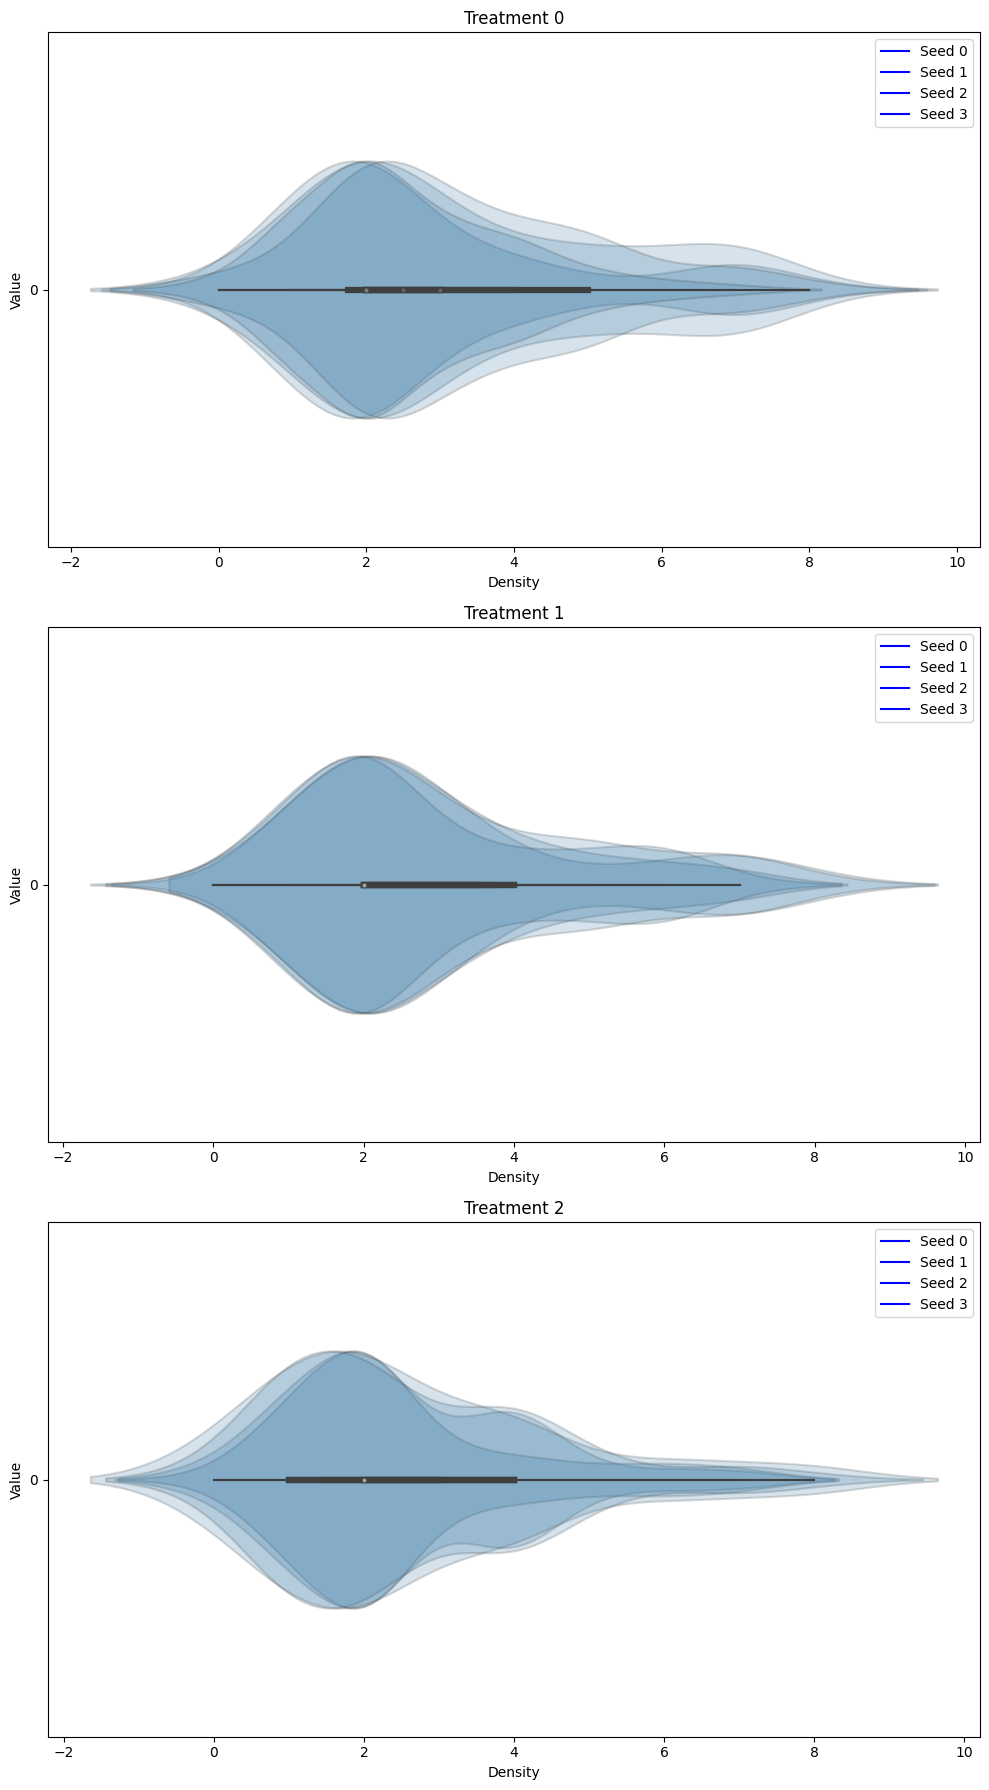

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming all_folders_choices is defined somewhere before this code snippet

all_folders_choices = np.array(all_folders_choices)

# Calculate the number of treatments
num_treatments = all_folders_choices.shape[0]

# Set up subplots with enough height to accommodate all violin plots
fig, axs = plt.subplots(num_treatments, 1, figsize=(10, 6*num_treatments))

# Initialize variable for tracking the height of each subplot

for treatment in range(num_treatments):
    # Initialize lists to collect handles and labels for legend
    handles = []
    labels = []
    
    # Get the data for the current treatment
    for seed in range(len(all_folders_choices[treatment])):
        treatment_data = all_folders_choices[treatment][seed][1:].flatten()
        
        # Flatten the data for the current treatment
        flat_data = treatment_data.flatten()
        
        # Plot a violin plot for the current treatment
        vp = sns.violinplot(data=flat_data, ax=axs[treatment], split=True,
                            orient='h', label=f"Seed {seed}", width=0.5, scale='width')
        
        # Set transparency directly on the artists
        for artist in vp.collections:
            artist.set_alpha(0.2)
        
        # Add handle and label for legend
        handles.append(plt.Line2D([], [], color='blue')) # Assuming blue color for the violin plot
        labels.append(f"Seed {seed}")

    # Set title and labels for the subplot
    axs[treatment].set_title(f"Treatment {treatment}")
    axs[treatment].set_xlabel("Density")
    axs[treatment].set_ylabel("Value")
    
    # Display legend for the subplot
    axs[treatment].legend(handles, labels)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
print(len(all_folders_data))
print(len(all_folders_data[0]))
print(len(all_folders_data[0][0]))
print(len(all_folders_data[0][0][0]))
print(len(all_folders_data[0][0][0][0]))

print(np.array(all_folders_data).squeeze().shape)

NameError: name 'all_folders_data' is not defined

In [ ]:
print(all_folders_data[0][0][0][0])

"But I must explain to you how all this mistaken idea of denouncing of a thrill and praising peril was born and I will give you a complete account of the system, and expound the actual teachings of the great explorer of the unknown, the master-builder of cosmic happiness. No one rejects, dislikes, or avoids thrill itself, because it is thrill, but because those who do not know how to pursue thrill rationally encounter consequences that are extremely perilous. Nor again is there anyone who loves or pursues or desires to obtain peril of itself, because it is peril, but occasionally circumstances occur in which toil and pain can procure him some great thrill."
